In [2]:
import pandas as pd
from helper import util_pids, util_visualizations # custom functions for pids and visualizations
import numpy as np
import matplotlib.pyplot as plt
import ast

# 1. Types

In [3]:
# read in types
types = pd.read_csv('path/to/types_with_pid.csv', sep=";")
del types['Unnamed: 0']
types.head()

,instance,class,frequency,pidspread,pldspread,id,pids
0,1988,album,4,2,4,89520215,"['p3a', 'p5', 'p5', 'p3a']"
1,196,year,1,1,1,250210719,['p8b']
2,53,year,2,1,1,333976287,['p8b']
3,2007,year,104,6,57,179643001,"['p25p8ap8b', 'p8b', 'p8b', 'p25', 'p8b', 'p8b..."
4,2,aircraft,21,4,16,472381603,"['p8b', 'p8b', 'p8b', 'p3a', 'p8b', 'p5', 'p8b..."


In [4]:
# get shape
types.shape # 20,745 which is correct

(20745, 7)

In [7]:
# get all unique pids in types
unique_pids_types_pure = util_pids.get_all_different_pids(types, 'pids')
len(unique_pids_types_pure)

58

In [37]:
# append number of occurrences as new column to types dataframe
pure_types_with_pids = util_pids.append_pids_to_data(types, unique_pids_types_pure, 'pids')

In [38]:
# get occurrences of pids as dataframe 
occurences_pids_types_pure = util_pids.get_occurence_pids(pure_types_with_pids, 'pids')
occurences_pids_types_pure.sort_values(by='occurrence', ascending=False).head()

,pid,occurrence
54,p8a,14422
51,p5,9251
47,p3a,6344
0,p1,5363
55,p8b,3994


## 1.1 Get pids

In [53]:
# append number of occurrences as new column to types dataframe
all_types_with_pids = util_pids.append_pids_to_data(all_types, unique_pids_types, 'pids')

In [56]:
# import to avoid costly computations
all_types_with_pids = pd.read_csv('path_to/9_FINAL/data/machine_learning/one_hot_encoded/types_one_hot_encoded.csv',sep=";")
del all_types_with_pids['Unnamed: 0']

In [57]:
# get occurrences of pids as dataframe 
occurences_pids_types = util_pids.get_occurence_pids(all_types_with_pids, 'pids')
occurences_pids_types.head()

,pid,occurrence
0,p1,28744
1,p10,13513
2,p11,1631
3,p12a,7602
4,p12b,76


## 1.2 Visualize occurrence

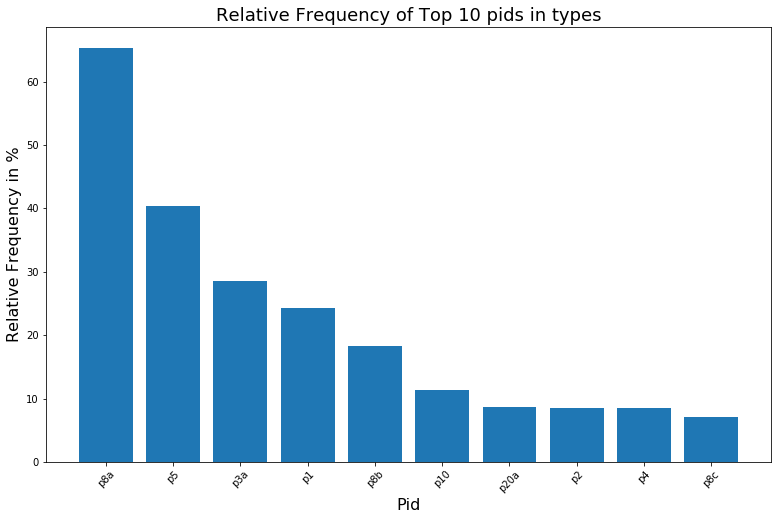

In [58]:
# visualize relative occurrence of pids in types 
util_visualizations.visualize_pids(occurences_pids_types, all_types, 'types')

# 2. Goldstandard

# 2.1 Calculate one hot of goldstandard

In [8]:
# read data
goldstandard = pd.read_csv('/path/to/9_FINAL/data/goldstandard/goldstandard_with_pids.csv',sep=";")
del goldstandard['Unnamed: 0']
goldstandard.head()

,_id,instance,class,frequency,pidspread,pldspread,modifications
0,141663461,b1,waveform,3,2,3,['p34p8a']
1,147713771,adjective,also,3,2,3,['p34p2']
2,270852864,advance,cattle,1,1,1,['p23b']
3,516170918,administration,"failure,period",1,1,1,['p8c']
4,387574181,agnium,planet,1,1,1,['p8a']


In [9]:
# append number of occurrences as new column to goldstandard dataframe
goldstandard_with_pids = util_pids.append_pids_to_data(goldstandard, unique_pids_types_pure, 'modifications')

In [10]:
goldstandard_with_pids.head()

,_id,instance,class,frequency,pidspread,pldspread,modifications,p1,p10,p11,...,p4,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d
0,141663461,b1,waveform,3,2,3,[p34p8a],0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,147713771,adjective,also,3,2,3,[p34p2],0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,270852864,advance,cattle,1,1,1,[p23b],0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,516170918,administration,"failure,period",1,1,1,[p8c],0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,387574181,agnium,planet,1,1,1,[p8a],0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
goldstandard_with_pids[goldstandard_with_pids['pidspread'] == goldstandard_with_pids['pidspread'].max()]

,_id,instance,class,frequency,pidspread,pldspread,modifications,p1,p10,p11,...,p4,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d
25,493068154,dragon,move,35,10,26,"[p5p34, p5, p8a, p21a, p5, p8a, p8a, p34, p10,...",1,1,0,...,0,0,0,1,0,0,1,1,0,0


In [13]:
# export data
goldstandard_with_pids.to_csv('/path/to/9_FINAL/data/goldstandard/goldstandard_one_hot.csv',sep=";")

## 2.2 Goldstandard with counts

In [14]:
# counts of goldstandard
goldstandard_counts_pids = util_pids.append_count_pids_to_data(goldstandard, unique_pids_types_pure, 'modifications')

In [15]:
goldstandard_counts_pids.head()

,_id,instance,class,frequency,pidspread,pldspread,modifications,p1,p10,p11,...,p4,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d
0,141663461,b1,waveform,3,2,3,[p34p8a],0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,147713771,adjective,also,3,2,3,[p34p2],0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,270852864,advance,cattle,1,1,1,[p23b],0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,516170918,administration,"failure,period",1,1,1,[p8c],0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,387574181,agnium,planet,1,1,1,[p8a],0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [16]:
# sanity check
goldstandard_counts_pids[goldstandard_counts_pids['pidspread'] == goldstandard_counts_pids['pidspread'].max()]

,_id,instance,class,frequency,pidspread,pldspread,modifications,p1,p10,p11,...,p4,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d
25,493068154,dragon,move,35,10,26,"[p5p34, p5, p8a, p21a, p5, p8a, p8a, p34, p10,...",1,1,0,...,0,0,0,8,0,0,8,3,0,0


In [17]:
# export data
goldstandard_counts_pids.to_csv('path/to/9_FINAL/data/goldstandard/goldstandard_count.csv',sep=";")